# Example 1

I this notebook, we will walk through how to use  `cpnet` in stages. To start, we need the following pacakges:

In [1]:
import cpnet
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Basic usage

The network we will analyze is the karate club network, which can be loaded using `networkx`.

In [2]:
G = nx.karate_club_graph()

`networkx` has many easy-to-use APIs that constructs a network from files like an edge list. For details, please see `networkx` documentation.

Among many algorithms implemented in `cpnet`, we demonstrate an algorithm named the Borgatti-Everett (BE) algorithm. 
In `cpnet`, detecting core-periphery structure requires two steps: loading algorithm and giving a network to it as an input: 

In [3]:
alg = cpnet.BE() # Load the Borgatti-Everett algorithm
alg.detect(G) # Give the network as an input

All set. The detected core-periphery structure can be retrieved with `get_coreness` and `get_pair_id` methods in the `cpnet.BE`:

In [4]:
x = alg.get_coreness()  # Get the coreness of nodes
c = alg.get_pair_id()  # Get the group membership of nodes

So, what are `x` and `c`?

Both `x` and `c` are python `dict` objects, with keys corresponding to the IDs of nodes (which we can see by `G.nodes()`).

`x[i]` indicates the coreness indicate a *coreness*. The coreness ranges in [0,1], where a larger value indicates a stronger affiliation to the core. For example, the detected `x` looks like

In [5]:
print(x)

{0: 1, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 1, 33: 1}


where `x[i]=1` or `x[i]=0` means that node `i` belongs to a core or a periphery, respectively. In BE algorithm, a node belongs to either a core and a periphery. Therefore, `x[i]` takes 0 or 1.

The other `dict` object, `c`, indicates the group to which the node `i` belongs, which we will explain in more details soon.

`cpnet` offers a simple function to visualize the detected core-periphery structure:  

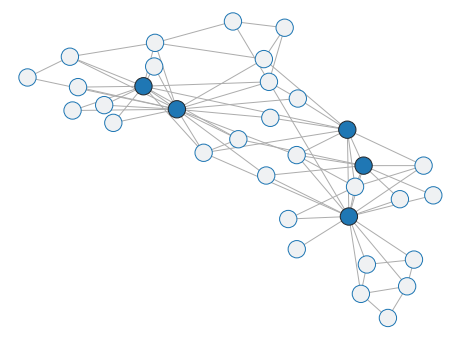

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(G, c, x, ax)

where the filled and open circles indicate the detected core and periphery, respectively. 

# Continuous core-periphery structure

The BE algorithm classifies nodes into a core and a periphery. However, such binary classification can be too crude if a node has a mixed property of core and periphery. Therefore, some algorithms aim to find core-periphery structure with a fuzzy boundary between core and periphery, continuous core-periphery structure. 

Let us demonstrate an algorithm to this end, called MINRES:

In [7]:
alg = cpnet.MINRES()
alg.detect(G)
x = alg.get_coreness() 
c = alg.get_pair_id()

We note that the coreness value varies between 0 and 1. 

In [8]:
print(x)

{0: 0.7983987354440458, 1: 0.6990704865317339, 2: 0.5766814648201208, 3: 0.5452369660984175, 4: 0.6320157719588437, 5: 0.6071934495315646, 6: 0.3396217673466095, 7: 0.35505952511122457, 8: 0.5467275463601147, 9: 0.16177474680673348, 10: 0.363149417658993, 11: 0.46973094917258507, 12: 0.3863995801232314, 13: 0.4903473379806882, 14: 0.5472708015533955, 15: 0.08243727627564905, 16: 0.1528763781294791, 17: 0.6254947811702981, 18: 0.16312022029310258, 19: 0.27763877770346057, 20: 0.09169792678151899, 21: 0.44095841993915724, 22: 0.47948287733523154, 23: 0.2036046053137766, 24: 0.2747265747470232, 25: 0.13576348780310457, 26: 0.10042724472889457, 27: 0.24691414584280522, 28: 0.22393578985843834, 29: 0.1921062252617749, 30: 0.6022304823990388, 31: 0.39084380213657816, 32: 0.5130785223247564, 33: 0.4989017453680171}


We can visualize the continuous spectrum of coreness values by 

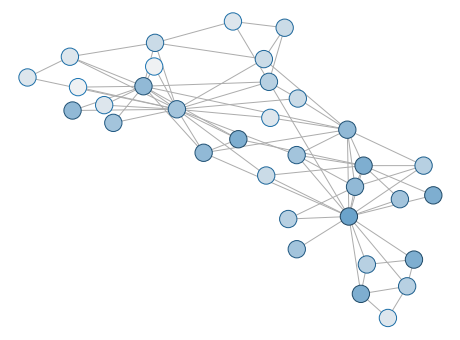

In [9]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(G, c, x, ax, pos = pos)

where the darkness of the circles indicates the coreness of the node. Unlike the BE algorithm, there is no clear cut between core and periphery.

# Multiple core-periphery pairs

So far, we consider that a network has a single core and a single periphery, with or without some sub-peripheral nodes in between. However, a network may have multiple groups, where each group is a pair of a core and a periphery. 

An algorithm to this end is the KM algorithm:

In [10]:
kmconfig = cpnet.KM_config()
kmconfig.detect(G)

Get the results by 

In [11]:
c = kmconfig.get_pair_id()
x = kmconfig.get_coreness()

Here `c` has meaningful information. 

`c` is used to store the group membership of nodes, where `c[i]` indicates the membership of the node.

In [12]:
print(c)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 0, 8: 3, 9: 3, 10: 1, 11: 0, 12: 0, 13: 0, 14: 3, 15: 3, 16: 1, 17: 0, 18: 3, 19: 0, 20: 3, 21: 0, 22: 3, 23: 3, 24: 2, 25: 2, 26: 3, 27: 3, 28: 2, 29: 3, 30: 3, 31: 2, 32: 3, 33: 3}


We can visualize the results in the same way as for the BE and MINRES algorithms:

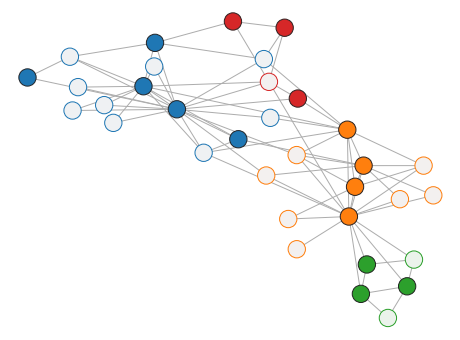

In [13]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, _ = cpnet.draw(G, c, x, ax, pos=pos)

The color of nodes indicate the membership of nodes. 

# Summary

In this example, we have demonstrated three algorithms of different types, BE, MINRES and KM algorithms. These algorithms find different core-periphery structure because they aim for different types of core-periphery structure.
We develop `cpnet` to use the different algorithms in the same APIs. There are many other algorithms not demonstrated in this example such as LowRank algorithm, Rombach's algorithms, Surprise. Please see the ReadMe or the documentations for the available algorithms. 